In [23]:
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [24]:
emgs = np.loadtxt('emg_.txt')
labels = np.loadtxt('restimulus_.txt')
repetitions = np.loadtxt('rerepetition_.txt')

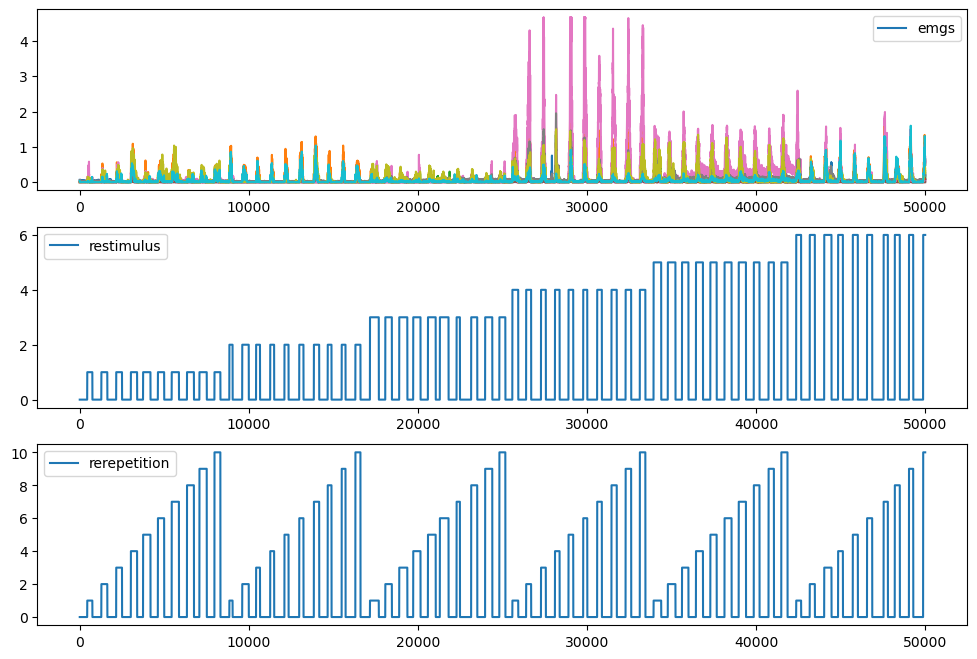

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(311)
sample_dots = len(emgs)
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, emgs)
plt.legend(['emgs'])
plt.subplot(312)
sample_dots = len(labels)
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, labels)
plt.legend(['restimulus'])
plt.subplot(313)
sample_dots = len(repetitions)
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, repetitions)
plt.legend(['rerepetition'])
plt.show()

### Filtrado

In [26]:
 # perform 1-order 1Hz low-pass filter
order = 1
fs = 100 # sample rate: 100Hz
cutoff = 1 # cutoff frequency
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = signal.butter(order, normal_cutoff, 'lowpass')

filt_emgs = np.empty_like(emgs)
for _col in range(emgs.shape[1]):
    filt_emgs[:,_col] = signal.filtfilt(b, a, emgs[:,_col])

Grafico comparativo de las señales filtradas y sin filtrar

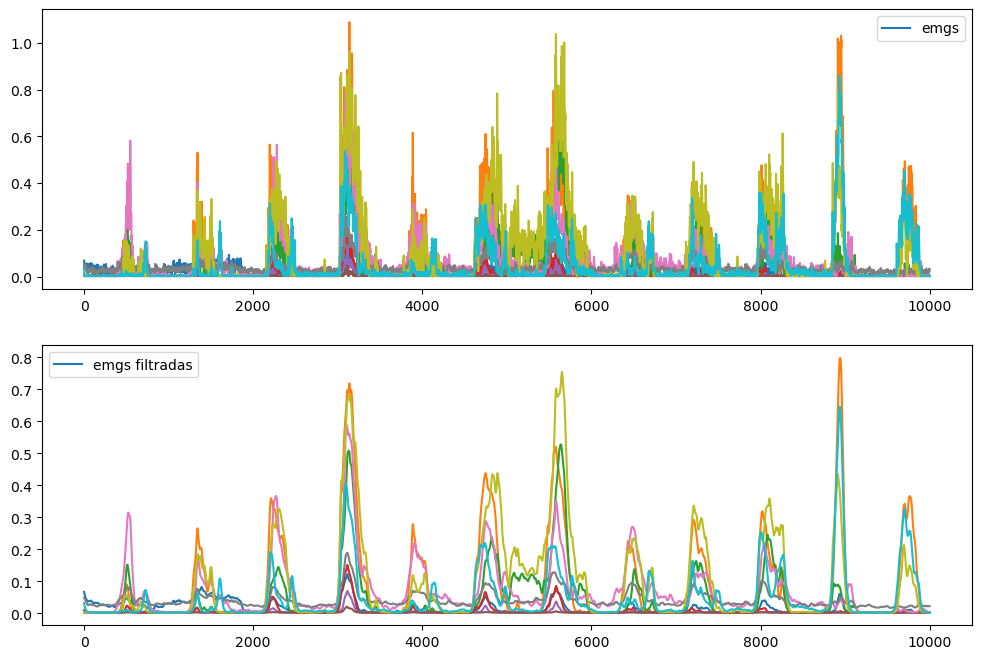

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(211)
sample_dots = 10000
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, emgs[:sample_dots])
plt.legend(['emgs'])
plt.subplot(212)
sample_dots = 10000
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, filt_emgs[:sample_dots])
plt.legend(['emgs filtradas'])
plt.show()

### Normalizacion

La transformación **μ-law** se define por la siguiente ecuación:

$$
F(x) = \frac{\log(1 + \mu |x|)}{\log(1 + \mu)} \cdot \text{sgn}(x)
$$

In [28]:
filt_emgs_n = np.empty_like(filt_emgs)
# u-law normalization
u = 256
filt_emgs_n = np.sign(filt_emgs) * np.log(1+u*abs(filt_emgs))/np.log(1+u)

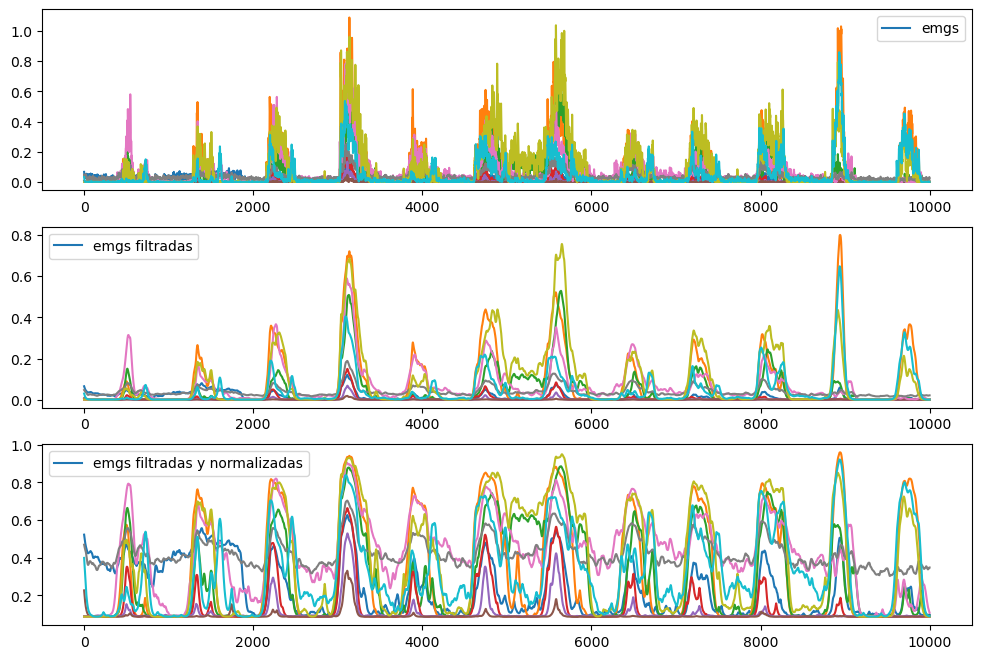

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(311)
sample_dots = 10000
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, emgs[:sample_dots])
plt.legend(['emgs'])
plt.subplot(312)
sample_dots = 10000
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, filt_emgs[:sample_dots])
plt.legend(['emgs filtradas'])
plt.subplot(313)
sample_dots = 10000
indices = [i for i in range(0, sample_dots, 1)]
plt.plot(indices, filt_emgs_n[:sample_dots])
plt.legend(['emgs filtradas y normalizadas'])
plt.show()

### Segmentacion



In [48]:
# segmentation of training and testing samples
length_dots = len(labels)
data_train = []
labels_train = []
data_val = []
labels_val = []
seq_lens = [20]
step = 1
# print(length_dots - length_dots%20)
try:
    for seq_len in seq_lens:
        for idx in range(0, length_dots - length_dots%seq_len, step):
            # print(idx)
            if labels[idx]>0 and labels[idx+seq_len-1]>0 and labels[idx]==labels[idx+seq_len-1]:
                repetition = repetitions[idx]
            if repetition in [2,5,7]: # val dataset
                data_val.append(filt_emgs_n[idx:idx+seq_len,:])
                labels_val.append(labels[idx])
            else: # train dataset
                data_train.append(filt_emgs_n[idx:idx+seq_len,:])
                labels_train.append(labels[idx])
except IndexError:
    print("Error: Indice fuera del rango, la ultima ventana no se tiene en cuenta.")
print("Entrenamiento")
print(len(data_train))
print(len(data_train[0]))
print(data_train[0])
print(len(labels_train))
print(labels_train[:1])
print("Validacion")
print(len(data_val))
print(len(labels_val))

Error: Indice fuera del rango, la ultima ventana no se tiene en cuenta.
Entrenamiento
34894
20
[[0.52226301 0.08641727 0.08791174 0.08643869 0.08638923 0.22621355
  0.08631408 0.46885467 0.08631408 0.39873083]
 [0.51863636 0.08642396 0.08801492 0.08644677 0.0863941  0.22060062
  0.08631408 0.46637686 0.08631408 0.39111412]
 [0.5149885  0.08643109 0.08812474 0.08645538 0.08639929 0.21498742
  0.08631408 0.46393864 0.08631408 0.38318335]
 [0.5113438  0.08643868 0.08824161 0.08646455 0.08640482 0.20942628
  0.08631408 0.46159213 0.08631408 0.37500231]
 [0.50771585 0.08644676 0.08836599 0.08647431 0.08641071 0.20394155
  0.08631408 0.45936687 0.08631408 0.36664905]
 [0.50413356 0.08645537 0.08849833 0.0864847  0.08641698 0.19859893
  0.08631408 0.45725917 0.08631408 0.3581886 ]
 [0.50062149 0.08646453 0.08863916 0.08649577 0.08642365 0.19343344
  0.08631408 0.4552563  0.08631408 0.34966811]
 [0.49719204 0.08647429 0.08878901 0.08650755 0.08643076 0.1884441
  0.08631408 0.45335401 0.0863140

## Referencias

* https://github.com/increase24/Ninapro-dataset-processing/tree/master
* https://biosppy.readthedocs.io/en/stable/